<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загружаем-модули" data-toc-modified-id="Загружаем-модули-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загружаем модули</a></span></li><li><span><a href="#Загружаем-дополнительные-модули" data-toc-modified-id="Загружаем-дополнительные-модули-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загружаем дополнительные модули</a></span></li><li><span><a href="#Загружаем-данные" data-toc-modified-id="Загружаем-данные-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Загружаем данные</a></span></li><li><span><a href="#Проверяем-данные" data-toc-modified-id="Проверяем-данные-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверяем данные</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

### Загружаем модули

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression # линейная регрессия
from sklearn.metrics import r2_score

### Загружаем дополнительные модули

In [2]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns


### Загружаем данные

In [3]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

### Проверяем данные
Посмотрим info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


В типах данных всё впорядке

Проверим на пропуски и дубликаты

In [5]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [6]:
df.duplicated().sum()

153

Дубликаты имеются, удаляем

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Проверка на мультиколениарность

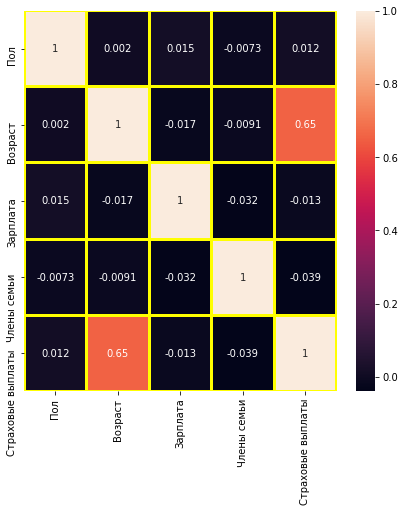

In [8]:
plt.rcParams['figure.figsize'] = (7.0, 7.0)
sns.heatmap(df.corr(), annot=True, linewidths=2, linecolor='yellow');

Обнаружена зависимость между возрастом и страховыми выплатами, но она некритичная.

### Вывод

В данных нет проблем, единственная проблемма - дубликаты, решена.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** 
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

 a. Изменится. Приведите примеры матриц.
 
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** Не изменится

**Обоснование:**

Для начала нам следует указать некоторые свойства матриц:

$$
(AB)^{-1} = B^{-1}A^{-1}
$$
$$
(AB)^T = B^T A^T
$$
$$
AA^{-1} = E
$$
$$
AE = EA = A
$$
$$
A(BC) = (AB)C
$$


пусть матрица Z обратима, и она имеет размерность 4х4, наша добноженная матрица будет иметь вид X * Z
Формула предсказания:

$$
a = Xw, w = (X^T X)^{-1} X^T y
$$

Формула предсказания с учётом домножения на матрицу Z:

$$
a = XZw
$$

Раскроем формулу:

$$
a = XZ((XZ^T) XZ)^{-1}(XZ)^T y
$$

Раскроем скобки с транспонированием матриц :

$$
a = XZ(Z^T X^T XZ)^{-1}Z^T X^T y 
$$

Выделим множетели $Z^T X^T X $ и раскроем скобки:

$$
a = XZZ^{-1}(Z^T X^T X)^{-1}Z^T X^T y
$$

Выделим внутри оставшихся скобок множители $Z^T$ и $X^T X$ и раскроем скобки:

$$
a = XZZ^{-1}(X^T X)^{-1}(Z^T)^{-1}Z^T X^T y
$$

Произведения $ZZ^{-1}$ и $(Z^T)^{-1}Z^T$ дают единичные матрицы. С учетом этого формула принимает вид:

$$
a = X(X^T X)^{-1} X^T y
$$
Так как $w = (X^T X)^{-1} X^T y$, то получаем:
$$
a = Xw, w = (X^T X)^{-1} X^T y
$$

Таким образом доказали, что домножение на обратимую матрицу не изменит предсказаний.

## Алгоритм преобразования

**Алгоритм**

В качестве алгоритма преобразования будем использовать домножения признаков на случайную обратимую матрицу размером 4х4. Далее
создадим модель линейной регрессии. Будем обучать её на изначальных и на преобразованных данных, затем сравним R2. R2 должны быть одинаковы в обоих случаях.

**Обоснование**

Выше было доказано, что при умножении признаков на обратимую матрицу соответствуюшего размера (т.е. в данном случае 4х4) не влияет на предсказания.

## Проверка алгоритма

Сначала обучаем модель на изначальной выборке и смотрим результат.

In [9]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2 = r2_score(target, predictions)
print(f'Метрика R2 для признаков в исходном состоянии равняется {r2}')

Метрика R2 для признаков в исходном состоянии равняется 0.4302010044852066


Теперь домножаем матрицу признаков на случайную обратимую матрицу 4х4. Сначала создаём матрицу:

In [10]:
a = 4
b = 4
c = 10

while True:
    matrix = (np.random.rand(a, b) )*c+ 1
    
    try:
        #Проверяем матрицу на обратимость. Если она обратима - то прерываем цикл
        np.linalg.inv(matrix)
        break
    except:
        ...
        
print(matrix)

[[ 2.90690987  3.78526395  2.08007347  6.28405328]
 [10.75447926  6.7557402  10.77980565  5.69773617]
 [ 8.77625299  3.23569979  4.5572319   2.66557145]
 [ 9.96141456  9.35604817  8.18031873  8.87737549]]


Теперь домножаем наши признаки:

In [11]:
features_new = features @ matrix
features_new.head()

,0,1,2,3
0,435755.950033,160780.836445,226490.934713,132461.112704
1,334002.280893,123276.712271,173678.863616,101562.688471
2,184613.192585,68145.612141,96014.484285,56142.234872
3,366215.516371,135089.264053,190279.306827,111291.736820
4,229364.235239,84644.710614,119247.667248,69737.235602


Теперь проверяем на новых признаках линейную регрессию:

In [12]:
model2 = LinearRegression()
model2.fit(features_new, target)
predictions = model2.predict(features_new)
r2_new = r2_score(target, predictions)
print(f'Метрика R2 для признаков в исходном состоянии равняется {r2}')
print(f'Метрика R2 для признаков в умноженном состоянии равняется {r2_new}')

Метрика R2 для признаков в исходном состоянии равняется 0.4302010044852066
Метрика R2 для признаков в умноженном состоянии равняется 0.43020100448522236


## Вывод
Как видим, значения метрик R2 в исходном и преобразованном состоянии практически одинаково. Скорее всего разница после 13 знака после запятой вызвана техническими причинами (т.е. Питон, всё же, не хранит реальные вещественные числа и может их немного округлять). 

И в теории и на практике метод домножения на матрицу работает.